******************
Basics in Scatterplots and Line Graph:


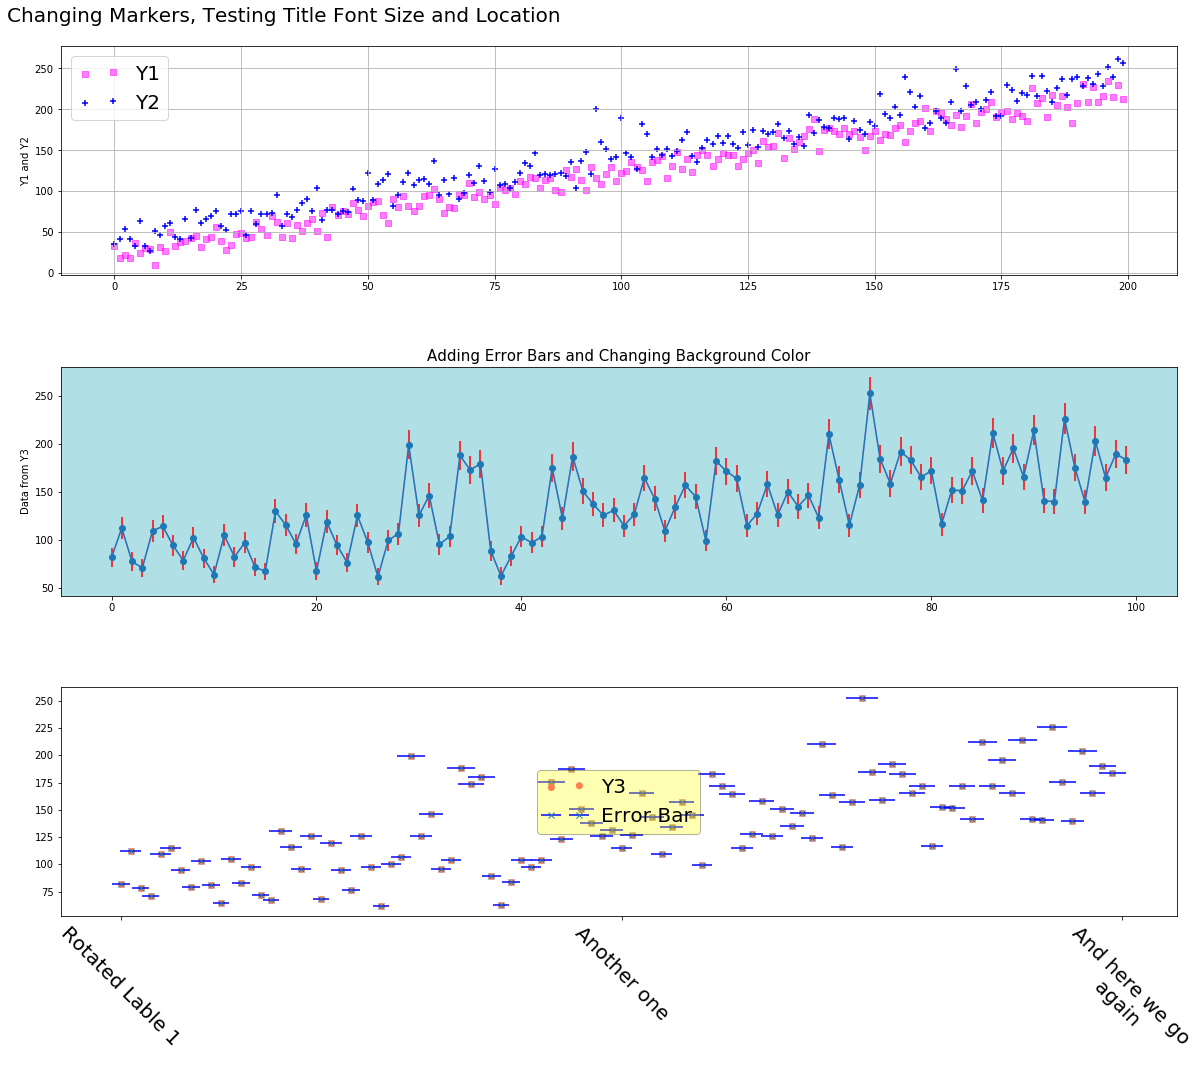

In [6]:
#Scatterplots and Line Graphs: 

'''
Main functions used:
ax.scatter
ax.plot
pylab.savefig

ax.scatter/plot Parameters used:
colors
marker
alpha
label
loc

Other functions and parameters:
plt.subplots_adjust: hspace                                  #to adjust the distances between subplots
ax.legend: scatterpoints, numpoints, loc, fontsize           #to make legends
ax.legend.get_frame().set_alpha                              #to set the level of opaqueness for legend frames
ax.legend.get_frame().set_facecolor                          #to set the legend background color
ax.legend.get_frame().set_edgecolor                          #to set the legend frame color
ax.errorbar: ecolor, xerr/yerr, fmt                          #to set the error bars, fmt is the marker shape
ax.grid                                                      #to add grid
ax.set_x/ylab                                                #to set x.y lable
ax.set_title: loc(x,y), fontsize,                            #to set subplots' titles, x=0.2 would be far left, y=0.5 would be the center
ax.set_facecolor                                             #to set the background color for the graph
ax.set_xticks                                                #to set the ticks on x axis
ax.set_xticklabels: rotation, fontsize
'''

print("******************\nBasics in Scatterplots and Line Graph:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(20, 16))
plt.subplots_adjust(hspace = 0.4) #Adjusting the space between subplots.

#Setting Subplots:
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

#Setting data, and errors:
y1 = np.arange(200) + 5 * np.random.normal(loc = 5, scale = 2, size = 200)
y2 = np.arange(200) + 5 * np.random.gamma(9, 1, 200)
y3 = np.arange(100) + 5 * np.random.gamma(9, 2, 100)
yerr3 = 1 + np.sqrt(y3)
xerr3 = 0.1*np.sqrt(y3)
x1 = np.arange(200)
x2 = np.arange(100)
x3 = np.arange(100)

#Plot a 3 by 1 graph:

#Plot the first graph: legends, different markers & colors, grid, axis label and a relocated title
plt1 = ax1.scatter(x1, y1, c="magenta", marker = "s", alpha = 0.5, label = "Data 1")
plt2 = ax1.scatter(x1, y2, c='b', marker = "+")
ax1.legend((plt1, plt2),("Y1", "Y2"), 
           scatterpoints = 2, loc = "upper left", fontsize = 20)
ax1.grid(True)
ax1.set_ylabel("Y1 and Y2")
ax1.set_title("Changing Markers, Testing Title Font Size and Location", y=1.08, x=0.2, fontsize = 20)

#Plot the second graph: added error bars, changed the background color
ax2.plot(x2, y3, c="magenta", alpha = 0.3)
ax2.errorbar(x2, y3, ecolor = "red", yerr = yerr3, fmt = '-o')
ax2.set_ylabel("Data from Y3")
ax2.set_title("Adding Error Bars and Changing Background Color", fontsize = 15)
ax2.set_facecolor('powderblue')

#Plot the third graph: rotated axis labels, legend background and frames. 
plt3 = ax3.scatter(x3, y3, c="coral")
plt3_err = ax3.errorbar(x3, y3, ecolor = "b", xerr = xerr3, fmt = 'x')
ax3.set_xticks([0, 50, 100])
ax3.set_xticklabels(["Rotated Lable 1", "Another one", "And here we go\n again"], rotation = -45, fontsize = 20)
#Playing with the legends:
leg = ax3.legend((plt3, plt3_err),("Y3", "Error Bar"), 
                  numpoints = 2, scatterpoints = 2, loc = "center", fontsize = 20)
leg.get_frame().set_alpha(0.3)
leg.get_frame().set_facecolor("yellow")
leg.get_frame().set_edgecolor("k")

#Save the plot as png: this needs to be called before the show(), otherwise a new blank graph will be created.
pylab.savefig('A3_ScatterBasics', dpi = 80, figsize = (20,6)) #the figsize does not work in savefig, you can only try to do that by plt.figure(figsize)
#dpi is setting the resolution.

plt.show()


******************
Annotations and Drawings:
Randomly generated 4-columns' data: 
[[ 0.50526826  0.47715032  0.2256702   0.14119581]
 [ 0.50339287  0.23215721  0.67430106  0.26231922]
 [ 0.30489166  0.17022866  0.01764704  0.10313454]
 [ 0.68563679  0.80343178  0.42395417  0.69804051]
 [ 0.92956152  0.15752395  0.39890677  0.33010658]]


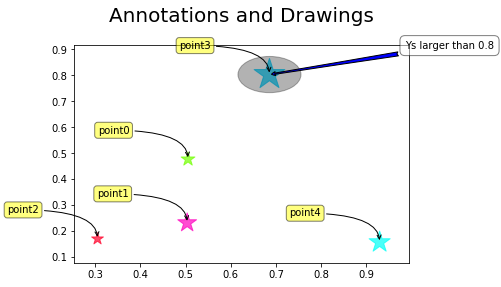

In [6]:
#Annotations and Drawings: 

'''
Main functions used:
ax.scatter: s, cmap, alpha, marker
ax.annotate: 
zip()
patches.Circle

ax.annotate Parameters:
bbox=dict(boxstyle, facecolor, alpha=0.5)
arrowprops=dict(arrowstyle, connectionstyle, facecolor)

patches Parameters:
patches.Circle
patches.Circle.set_alpha    
ax.add_artist
'''

print("******************\nAnnotations and Drawings:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

#Generating 10 by 4 data: first column presents x1, second column presents y1, third column presents colors, and the final is weights. 
N = 5
data = np.random.random((N, 4)) 
print("Randomly generated 4-columns' data: \n{}".format(data))
x1 = data[:, 0]
y1 = data[:, 1]
colors = data[:, 2]
weights = data[:, 3]

#Scatter plot:
plt.title("Annotations and Drawings", y=1.08, x=0.5, fontsize = 20)
ax1.scatter(
    x1, y1, marker='*', c=colors, s=weights * 1500,
    cmap=plt.get_cmap('gist_rainbow'),
    alpha = 0.7)

#Using zip for labels: 
#Documentation reference: https://bradmontgomery.net/blog/pythons-zip-map-and-lambda/ 
labels = ['point{}'.format(i) for i in range(N)]#Comprehension
for label, x, y in zip(labels, x1, y1):
    ax1.annotate(
        label,
        xy=(x, y), xytext=(x-0.2, y+0.1 ),
        bbox=dict(boxstyle='round', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle="angle3,angleA=0,angleB=-90"))

#Adding patches and annotations: 
#Documentation reference: https://matplotlib.org/devdocs/gallery/text_labels_and_annotations/annotation_demo.html
for find_x, find_y, find_weight in zip(x1, y1, weights):
    if find_y > 0.8:
        #Define patches:
        patch = patches.Circle(xy=(find_x, find_y), radius=find_weight*0.1, color = 'black')
        patch.set_alpha(.3)
        ax1.add_artist(patch)
        #Define arrows:
        ax1.annotate('Ys larger than 0.8', xy=(find_x, find_y), xytext=(find_x+0.3, find_y+0.1),
             bbox=dict(boxstyle='round,pad=0.5', alpha=0.5, facecolor = "white"), 
             arrowprops=dict(arrowstyle="fancy", facecolor='b'))
        
pylab.savefig('A3_AnnotationsDrawings')    
plt.show()


******************
Boxplots:


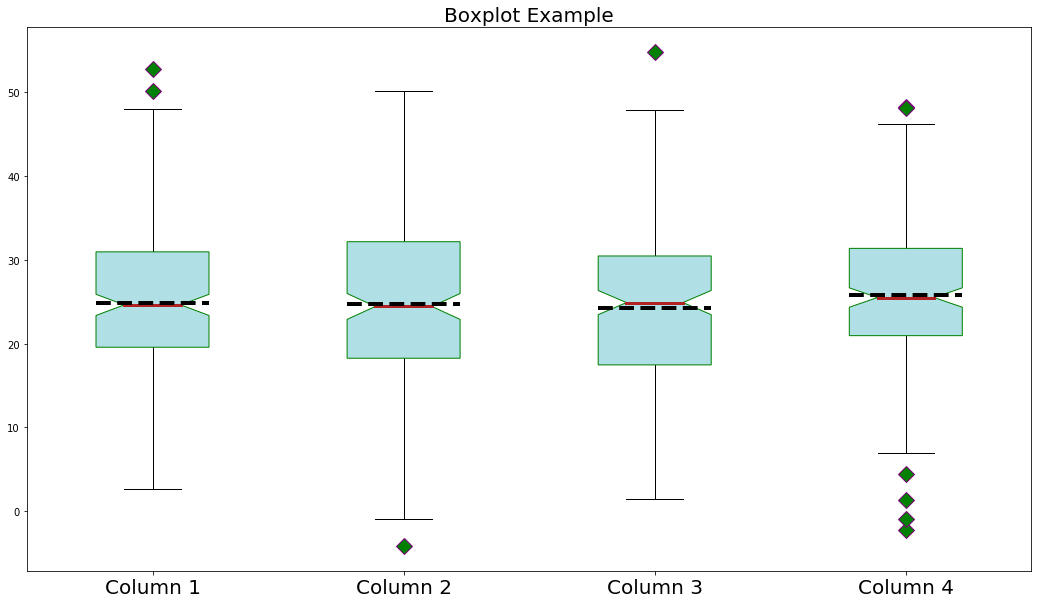

In [7]:
#Boxplots:

'''
Main functions used:
ax.boxplot

ax.boxplot Parameters:
notch(T/F)
showmeans(T/F)
meanline(T/F)
patch_artist(T/F)                                                                   #to allow some kwargs to function
boxprops=dict()                                                                     #to set the styles for boxes
flierprops = dict(marker, markeredgecolor, markerfacecolor, markersize, linestyle)  #to set the styles for outliers
meanprops = dict(linestyle, linewidth, color)                                       #to set the styles for mean lines
medianprops = dict(linestyle, linewidth, color)                                     #to set the styles for median lines

'''

print("******************\nBoxplots:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(1, 1, 1)
plt.title("Boxplot Example", fontsize = 20)

#Generating random normal dataset, 200 by 4. 
data = 5 * np.random.normal(loc = 5, scale = 2, size = (200,4))

#Plot:
ax1.boxplot(data, 
           notch = True, showmeans=True, meanline=True, patch_artist=True,
           boxprops = dict(facecolor="powderblue", color="green"), #Box characters
           flierprops = dict(marker='D', markeredgecolor='purple', markerfacecolor='green', markersize=12, linestyle='none'), #Outliers characters
           meanprops = dict(linestyle='--', linewidth=4., color='black'), #Mean line characters
           medianprops = dict(linestyle='solid', linewidth=3, color='firebrick')) #Median linne Characters
#X-axis labels: Comprehension
ax1.set_xticklabels(["Column {}".format(i) for i in range(1,5)], fontsize = 20)

pylab.savefig("A3_Boxplot")

plt.show()



******************
Histograms:


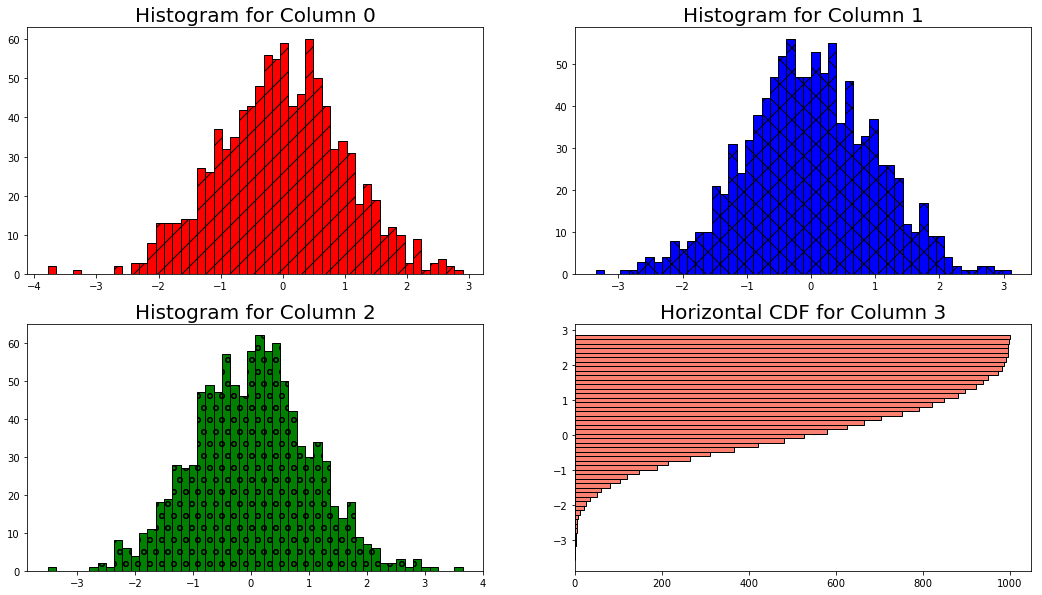

In [8]:
#Histogram plots:

'''
Main functions used:
ax.hist
zip()

ax.hist Parameters:
color
edgecolor
bins
hatch
cumulative(T/F)
orientation(horizontal/vertical)

'''

print("******************\nHistograms:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
#plt.title("Barplot Example", fontsize = 20 )

#Creating lists for Zip:
axes = [ax1, ax2, ax3, ax4]
colors = ["red", "b", "green", "salmon"]
column = [0, 1, 2, 3]
hatches = ["/", "x", "o", "/"]

#Generating 200 by 4 data:
N = 1000
data = np.random.normal(size = (N, 4))

#Plotting with Zip: 3 histgraoms and 1 CDF
for ax, c, col, h in zip(axes, colors, column, hatches):
    if col != 3: 
        ax.hist(data[:, col], color = c, bins=50, edgecolor = "black", hatch = h)
        ax.set_title("Histogram for Column {}".format(col), y=1, x=0.5, fontsize = 20)
    else:
         ax.hist(data[:, col], color = c, bins=50, edgecolor = "black", cumulative=True, orientation = "horizontal")
         ax.set_title("Horizontal CDF for Column {}".format(col), y=1, x=0.5, fontsize = 20)

pylab.savefig("A3_Histograms")
        
plt.show()



******************
Stacked Histograms:


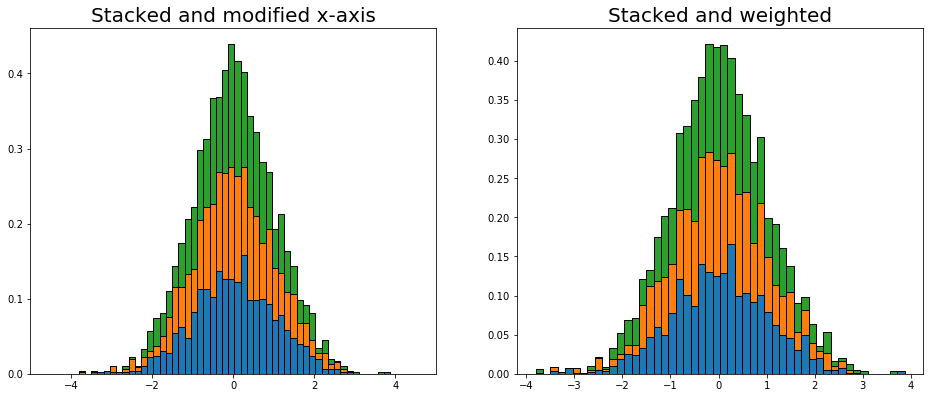

In [9]:
#Stacked histogram plots:

'''
Main functions used:
ax.hist

ax.hist Parameters:
stacked(T/F)
normed(T/F)
weights
color
edgecolor
bins

Other functions:
ax.set_xlim                    #to set the x-axis limits
'''

print("******************\nStacked Histograms:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(16, 14))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

N = 1000
data = np.random.normal(size = (N, 3))
weights = np.random.random(size=(N, 3))

ax1.hist([data[:, 0],data[:, 1],data[:, 2]], 
         bins=50, stacked=True, normed = True,
         edgecolor = "black")
ax1.set_xlim(-5, 5) #Changing the x-limits.
ax1.set_title("Stacked and modified x-axis", fontsize = 20)

ax2.hist([data[:, 0],data[:, 1],data[:, 2]], 
         bins = 50, stacked=True, normed = True,
         edgecolor = "black",
         weights = [weights[:, 0],weights[:, 1],weights[:, 2]])
ax2.set_title("Stacked and weighted", fontsize = 20)

pylab.savefig("A3_StackedWeightedHistogram")

plt.show()



******************
Barplot:
Means_1: [0.51254073985275173, 0.49722360025976498, 0.5179202228565738, 0.48424052276806551]
SDs_1: [0.029520936101145839, 0.029368647293260323, 0.029235998873324613, 0.026984251566053875]
Means_2: [0.48910609794983917, 0.49733371124205994, 0.52176909886476808, 0.53036016470846814]
SDs_2: [0.02976628427117007, 0.029258634877081958, 0.027787053502421333, 0.028018028232516472]
Means_3: [1.0302569188930304, 1.0169998285357118, 0.99735001598674611, 1.0063120941885466]
SDs_3: [0.027943718799393676, 0.02913626074386097, 0.029024518787328472, 0.028569362693669369]


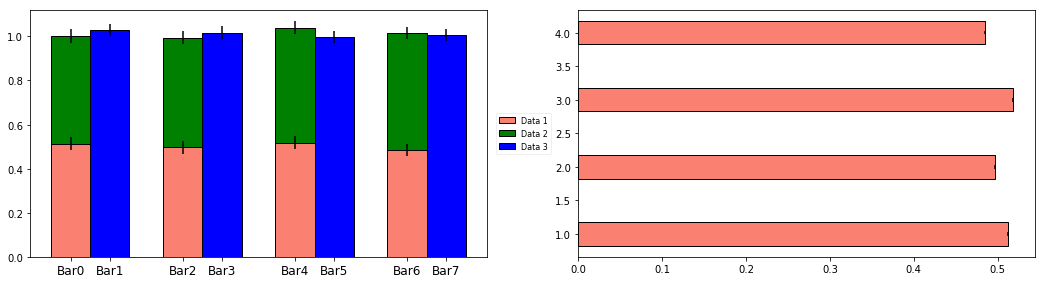

In [10]:
#Bar plots:

'''
Main functions used:
ax.bar
ax.barh                                              #to plot a horizontal bar chart

ax.bar Parameters:
width
bottom                                               #to mannually stack bar plots
color
edgecolor
yerr                                                  #to show the errors in y direction

Other functions:
ax.legend(loc, fs, bbox_to_anchor)                    #bbox_to_anchor: to put the legend outside the graph box
'''

print("******************\nBarplot:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

N1 = 200
data1 = np.random.random((N1, 4)) 
N2 = 100
data2 = np.random.random((N2, 4))
N3 = 300
data3 = np.random.random((N3, 4))
x = np.arange(4)+1
bar_width = 0.35

#List comprehension for means and Errors: 
means1 = list(np.mean(data1[:, col]) for col in range(0, 4))
SDs1 = list(np.std(data1[:, col])/10 for col in range(0, 4))
print("Means_1: {}".format(means1))
print("SDs_1: {}".format(SDs1))

means2 = list(np.mean(data2[:, col]) for col in range(0, 4))
SDs2 = list(np.std(data2[:, col])/10 for col in range(0, 4))
print("Means_2: {}".format(means2))
print("SDs_2: {}".format(SDs2))

means3 = list(np.mean(data3[:, col])+0.5 for col in range(0, 4))
SDs3 = list(np.std(data3[:, col])/10 for col in range(0, 4))
print("Means_3: {}".format(means3))
print("SDs_3: {}".format(SDs3))

plt1 = ax1.bar(x, means1, bar_width,  yerr = SDs1,
        color = "salmon", edgecolor = "black")
plt2 = ax1.bar(x, means2, bar_width, yerr = SDs2,
        bottom=means1, 
        color = "green", edgecolor = "black")
plt3 = ax1.bar(x+bar_width, means3, bar_width, yerr = SDs3, 
        color = "blue", edgecolor = "black")
plt4 = ax2.barh(x, means1, bar_width,  yerr = SDs1,
        color = "salmon", edgecolor = "black")

#Label each bar:
ax1.set_xticks([1, 1+bar_width, 2, 2+bar_width, 3, 3+bar_width, 4, 4+bar_width])
ax1.set_xticklabels(["Bar{}".format(i) for i in range(2*4)], fontsize = 12)

leg = ax1.legend((plt1, plt2, plt3),("Data 1", "Data 2", "Data 3"), 
            loc = "right", fontsize = 8, bbox_to_anchor = (1.15, 0.5)) #Putting the legend outside the plots. 
leg.get_frame().set_alpha(0.3)

pylab.savefig("A3_Barcharts")

plt.show()



******************
Pie plots:


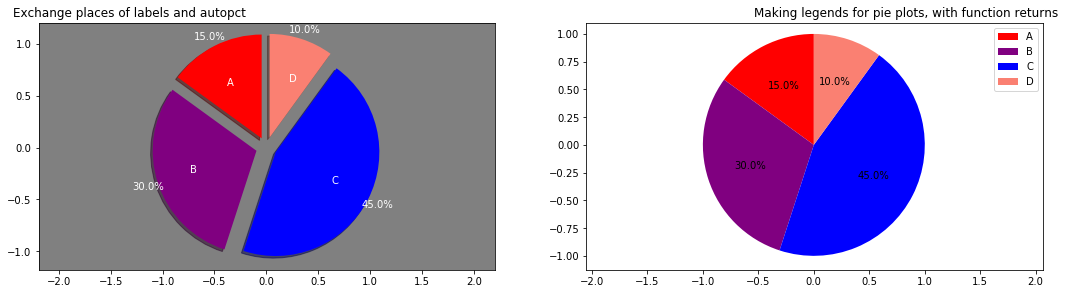

In [11]:
#Pie plot:

'''
Main functions used:
ax.pie                                             

ax.pie Parameters:
explode                                              #to make the pies seperated
autopct                                              #to label the size
labels                                               #to label the pies
shadow(T/F)
pctdistance                                          #to set the distances between the label of the size to the center
labeldistance                                        #to set the distances between the label of the pies to the center
textprops = dict(color)                              #to set the styles of the text, in this case, to only set the color
frame(T/F)                                           #to put the frame for the graph(only with frame, the fc can be shown)
startangle                                           #to set the angle of the pie chart

Other functions:
ax.set_facecolor                                     #to set the facecolor, only with frame is True
plt.legend                                           #to opt-out the auto label, and make a legend.
'''

print("******************\nPie plots:")

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import pylab

fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

labels = 'A', 'B', 'C', 'D'
sizes = [15, 30, 45, 10]
explode = [0.1, 0.1, 0.1, 0.1]
colors = ["red", "purple", "blue", "salmon"]

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, 
        pctdistance = 1.1, labeldistance = 0.6, colors = colors,
        textprops = dict(color = "white"), frame = True, startangle = 90) 
ax1.axis('equal')
ax1.set_facecolor('grey')
ax1.set_title('Exchange places of labels and autopct', x=0.2)

patches, texts, autotexts = ax2.pie(sizes, colors = colors, autopct='%1.1f%%', frame = True, startangle = 90)
plt.legend(patches, labels, loc="best")
ax2.axis('equal')
ax2.set_title('Making legends for pie plots, with function returns', x=0.7)

pylab.savefig('A3_PieCharts')

plt.show()
